
Final Project Report

    Class: DS 5100
    Student Name: Stephen Kullman
    Student Net ID: sjk5cu
    This URL: a URL to the notebook source of this document



Instructions

Follow the instructions in the Final Project isntructions and put your work in this notebook.

Total points for each subsection under Deliverables and Scenarios are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth 50 points.


# Deliverables

## The Monte Carlo Module (10)

Put the URL to your GitHub repo here.

Repo URL: https://github.com/sjk5cu/sjk5cu_ds5100_montecarlo

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

## Unit Test Module (2)

## Unit Test Results (3)

## Import (1)

In [191]:
import numpy as np
import pandas as pd
from montecarlo import Die,Game,Analyzer

## Help Docs (4)

## README.md File (3)

## Successful installation (2)

(base) stephenkullman@MacBook-Air sjk5cu_ds5100_montecarlo-1 % pip install montecarlo \
Collecting montecarlo \
  Downloading montecarlo-0.1.17.tar.gz (1.3 kB) \
  Preparing metadata (setup.py) ... done \
Building wheels for collected packages: montecarlo \
  Building wheel for montecarlo (setup.py) ... done \
  Created wheel for montecarlo: filename=montecarlo-0.1.17-py3-none-any.whl size=1857 \ sha256=1695eeda42ffca14236191f15150ad9650ecc27d1c647ea4e4db7b58056f62a4 \
  Stored in directory: /Users/stephenkullman/Library/Caches/pip/wheels/9b/96/96/9ba8cf535febd42d4b6f0650941b412502cd6f6471bca1bf12 \
Successfully built montecarlo \
Installing collected packages: montecarlo \
Successfully installed montecarlo-0.1.17 \

# Scenarios

## Scenario 1: A 2-headed Coin

Create a fair coin (with faces H and T) and one unfair coin in which one of the faces has a weight of 5 and the others 1

In [192]:
a = np.array(["H","T"])
coin1 = Die(a)
unfairCoin = Die(a)

In [193]:
unfairCoin.change_weights(side="H",new_weight=5)

Play a game of 1000 flips with two fair dice.

In [194]:
gameFair = Game([coin1,coin1])

In [195]:
gameFair.play(1000)

,Die1,Die2
0,H,T
1,T,T
2,H,T
3,T,H
4,H,T
...,...,...
995,T,T
996,T,T
997,H,T
998,H,T


Play another game (using a new Game object) of 1000 flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

In [196]:
gameUnfair = Game([unfairCoin,unfairCoin,coin1])

In [197]:
gameUnfair.play(1000)

,Die1,Die2,Die3
0,H,H,H
1,H,H,H
2,H,H,H
3,H,H,T
4,H,H,H
...,...,...,...
995,H,T,T
996,H,H,H
997,H,H,H
998,H,T,T


For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all Hs or all Ts.

In [198]:
fairAnalyzer = Analyzer(gameFair)

In [199]:
fairAnalyzer.jackpot()

506

In [200]:
unfairAnalyzer = Analyzer(gameUnfair)

In [201]:
unfairAnalyzer.jackpot()

377

For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

In [202]:
freqFair = fairAnalyzer.jackpot() / len(gameFair.show_results())
freqFair

0.506

In [203]:
freqUnfair = unfairAnalyzer.jackpot() / len(gameUnfair.show_results())
freqUnfair

0.377

Show your results, comparing the two relative frequencies, in a simple bar chart.

In [204]:
dictionary = {"Fair":[freqFair],
              "Unfair": [freqUnfair]}

In [205]:
bar_graph = pd.DataFrame(dictionary)

<Axes: >

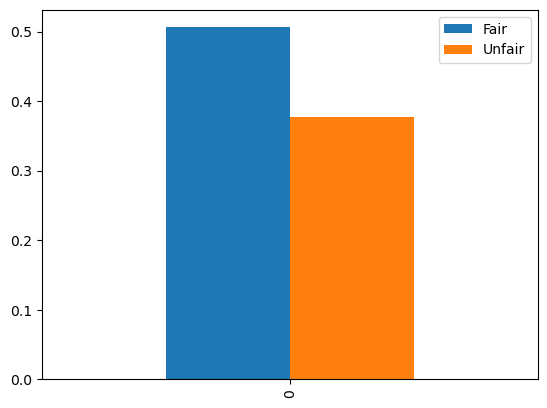

In [206]:
bar_graph.plot.bar()

## Scenario 2: A 6-sided Die

Create three dice, each with six sides having the faces 1 through 6.

In [207]:
a = np.array([1,2,3,4,5,6])
die1 = Die(a)
die2 = Die(a)
die3 = Die(a)

Convert one die to an unfair one by weighting the face five times more than the other weights (i.e. it has weight of and the others a weight of each).

In [208]:
die2.change_weights(6,5)

Convert another die to be unfair by weighting the face five times more than the others.

In [209]:
die3.change_weights(1,5)

Play a game of 10000 rolls with 5 fair dice.

In [210]:
dieGame = Game([die1,die1,die1,die1,die1])
dieGame.play(1000)

,Die1,Die2,Die3,Die4,Die5
0,5,2,3,6,4
1,1,3,3,2,5
2,1,5,4,1,3
3,2,4,4,3,6
4,2,4,4,1,1
...,...,...,...,...,...
995,5,4,1,6,6
996,2,3,5,1,4
997,6,1,4,1,6
998,1,1,6,3,1


Play a game of 10000 rolls with unfair dice, one as defined in steps #2 and #3 respectively, and fair dice.

In [211]:
dieGame2 = Game([die2,die3,die1,die1,die1])

In [212]:
dieGame2.play(1000)

,Die1,Die2,Die3,Die4,Die5
0,6,6,4,1,6
1,1,1,5,4,1
2,6,1,4,5,1
3,6,1,1,1,1
4,2,1,3,3,4
...,...,...,...,...,...
995,6,1,6,1,6
996,3,3,5,1,4
997,2,1,4,6,2
998,1,5,3,6,6


For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [213]:
analyzer1 = Analyzer(dieGame)
analyzer2 = Analyzer(dieGame2)

In [214]:
jackpot1 = analyzer1.jackpot()
jackpot1

1

In [215]:
jackpot2 = analyzer2.jackpot()
jackpot2

0

In [216]:
jackpot_graph = {"Die Game 1" :[jackpot1],
                 "Die Game 2" : [jackpot2]}

graph = pd.DataFrame(jackpot_graph)

<Axes: >

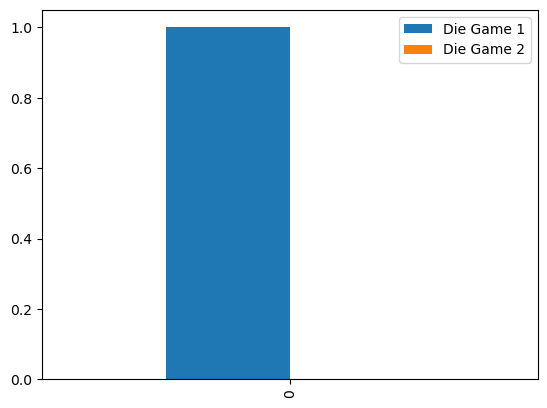

In [217]:
graph.plot.bar()

## Scenario 3: Letters of the Alphabet

Create a “die” of letters from to with weights based on their frequency of usage as found in the data file english_letters.txt. Use the frequencies (i.e. raw counts) as weights.

In [218]:
letters = pd.read_csv("/Users/stephenkullman/Desktop/Python/MonteCarlo/english_letters.txt",sep=" ", header=None)

In [219]:
faces = letters[0].to_list()
weights = letters[1].to_list()


In [220]:
die = Die(np.array(faces))

for i,face in enumerate(faces):
    die.change_weights(face,weights[i])
    

In [221]:
die.show_die()

,weights
side,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


Play a game involving 4 of these dice with 1000 rolls.

In [243]:
yahtzee = Game([die,die,die,die])
yahtzee.play(1000)

,Die1,Die2,Die3,Die4
0,I,T,R,S
1,W,N,E,K
2,S,P,C,O
3,S,O,A,G
4,L,F,N,T
...,...,...,...,...
995,I,O,T,T
996,H,F,I,L
997,N,S,U,G
998,O,W,H,B


Determine wow many distinct permutations in your results are actual English words, based on the vocabulary found in scrabble_words.txt.



In [244]:
yahtzeeAnalyzer = Analyzer(yahtzee)
words = yahtzeeAnalyzer.permu_count()
list = []
for index in (words.index):
    list.append("".join(index))

In [241]:
wordList = pd.read_csv("/Users/stephenkullman/Desktop/Python/MonteCarlo/scrabble_words.txt",header=None)
wordList = wordList.values.tolist()
wordFinal = []
for i in range(len(wordList)):
    wordFinal.append(wordList[i][0])

In [245]:
len(set(list) & set(wordFinal))

50

Repeat steps #2 and #3 using 5 dice and compare the results. Which word length generates a higher percentage of English words?

In [232]:
yahtzee2 = Game([die,die,die,die])
yahtzee2.play(1000)

In [233]:
words2 = yahtzee2.play(1000)

,Die1,Die2,Die3,Die4,Die5
0,E,O,A,D,P
1,U,W,I,P,S
2,H,T,A,T,K
3,O,N,G,S,T
4,O,T,K,O,E
...,...,...,...,...,...
995,H,E,U,G,E
996,T,B,M,L,T
997,E,R,O,A,A
998,O,M,T,E,E


In [234]:
list2 = []
for index in (words.index):
    list2.append("".join(index))

In [246]:
yahtzeeAnalyzer2 = Analyzer(yahtzee2)
words2 = yahtzeeAnalyzer2.permu_count()
list2 = []
for index in (words2.index):
    list2.append("".join(index))

In [247]:
len(set(list2) & set(wordFinal))

14